Всем привет!

Сегодня с помощью старых пластиковых бутылок, металлических банок, скотча и остатков упаковочного пенопласта мы проверим центральную предельную теорему. 😎

Для начала соберем бутылки в своей квартире и у соседей:

In [136]:
import math

import numpy
import scipy.stats

from matplotlib.pyplot import hist, legend, plot, show, subplot, xlabel, ylabel
%matplotlib inline

Не долго думая, выберем [распределение Лапласа](https://ru.wikipedia.org/wiki/Распределение_Лапласа). Оно такое острое. Люблю острое.

In [45]:
rv = scipy.stats.laplace()
sample = rv.rvs(1000)

Распределение Лапласа (картина неизвестного художника) и гистограмма нашей выборки, надежно скрепленные скотчем:

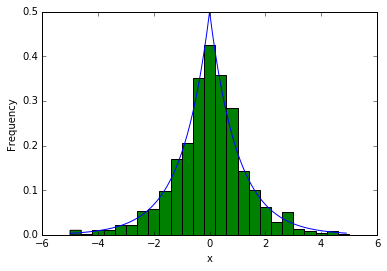

In [129]:
space = numpy.arange(-5, +5, 0.1)
plot(space, rv.pdf(space))
hist(sample, range=(-5, +5), bins=25, normed=True)
xlabel("X")
ylabel("Frequency")
show()

А следующая классная функция, собранная из пластиковых бутылок, будет строить график для фиксированного значения `n`:

In [154]:
def generate_and_plot(n):

    # Сгенерируем 1000 выборок объема n и посчитаем выборочные средние:
    averages = [numpy.mean(rv.rvs(n)) for _ in range(1000)]

    # При параметрах scipy.stats.laplace дисперсия этого распределения равна 2, а среднее равно нулю.
    # Так найдем же стандартную ошибку выборочного среднего:
    μ = 0
    σ = math.sqrt(2 / n)
    
    # Нарисуем гистограмму и теоретическое распределение (и снова скрепим их скотчем):
    space = numpy.arange(min(averages), max(averages), 0.01)
    plot(space, scipy.stats.norm(μ, σ).pdf(space), label="Theoretical PDF (se = %.2f)" % σ)
    hist(averages, range=(min(averages), max(averages)), bins=25, normed=True, label="Empirical PDF")
    
    xlabel("X")
    ylabel("Frequency")
    legend(bbox_to_anchor=(1, 1), loc="upper left")
    
    show()

Отлично! Теперь для всех заданных `n` нарисуем графики (разумеется, именно здесь нам понадобится пенопласт):

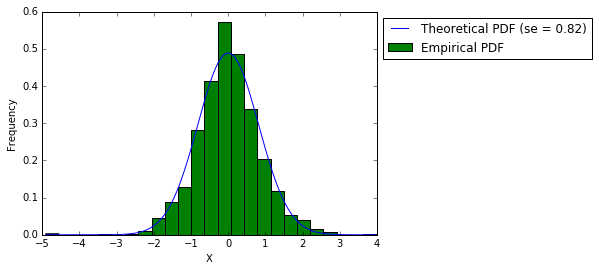

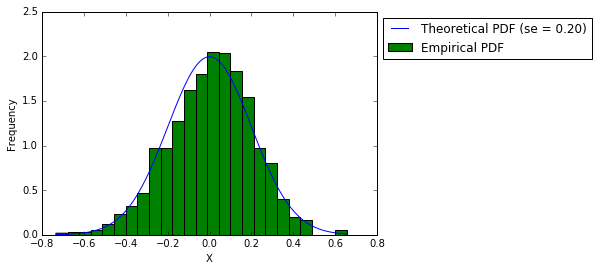

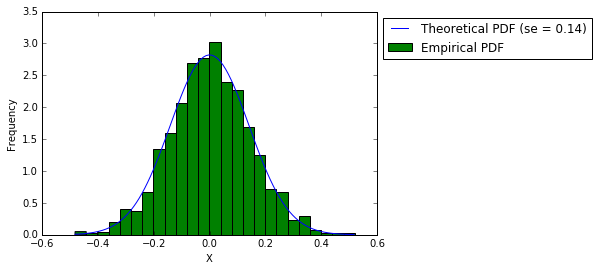

In [155]:
for n in (3, 50, 100):
    generate_and_plot(n)

Итак. В этом выпуске "Очумелых ручек" мы не только научились использовать старые металлические банки, но и увидели, что:

* С увеличением объема выборки стандартная ошибка среднего уменьшается.
* С увеличением объема выборки распределение средних все больше становится похоже на нормальное.